In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 2

Q1. a+b)

In [ ]:
im = Image.open(r"./Truman_receives_menorah_square.jpg").convert('L')
pix = np.array(im)
side_len = pix.shape[0]

In [ ]:
def get_uni_boundries(b, func_range):
    """ Returns an array with the uniform boundaried, with the lowest boundary at 0."""
    uni_boundries = [0]
    num_reps = np.power(2,b)
    interval_size = func_range / num_reps

    for i in range(num_reps):
        uni_boundries.append(int(uni_boundries[i] + interval_size))
    
    return uni_boundries

In [ ]:
def get_local_mse(matrix, rep):
    """ Returns the local MSE for the given sample region considering it is represented by rep."""
    curr_matrix = pd.DataFrame(matrix)
    curr_matrix -= rep
    curr_matrix = curr_matrix.pow(2)
    return np.mean(curr_matrix.to_numpy().flatten())

def get_local_mad(matrix, rep):
    """ Returns the local MAD for the given sample region considering it is represented by rep."""
    curr_matrix = pd.DataFrame(matrix)
    curr_matrix = np.abs(curr_matrix - rep)
    return np.mean(curr_matrix.to_numpy().flatten())

In [ ]:
function_range = 255
MSE_reps = []  # will be list of 2D arrays of represantators of every grid sample region
MSE_errors = []  # MSE error for every b
MAD_reps = []  # will be list of 2D arrays of represantators of every grid sample region
MAD_errors = []  # MSE error for every b
for b in range(1,9):
    MSE_errors.append(0)
    MAD_errors.append(0)
    D_value = np.power(2,b)
    MSE_rep = np.ndarray(shape=(D_value,D_value), dtype=float)
    MAD_rep = np.ndarray(shape=(D_value,D_value), dtype=float)
    list_of_xboundries = get_uni_boundries(b, side_len)
    list_of_yboundries = get_uni_boundries(b, side_len)
    for i in range(len(list_of_xboundries) - 1):
        for j in range(len(list_of_yboundries) - 1):
            lower_x = list_of_xboundries[i]
            upper_x = list_of_xboundries[i+1]
            lower_y = list_of_yboundries[j]
            upper_y = list_of_yboundries[j+1]
            local_pix = pix[lower_x:upper_x,lower_y:upper_y]

            # in the MSE sense: our represantator is the sample's mean
            sample_mean = np.mean(local_pix)
            MSE_rep[i][j] = sample_mean / function_range
            MSE_errors[b - 1] += get_local_mse(local_pix, sample_mean)

            # in the MAD sense: our represantator is the sample's median
            sample_median = np.median(local_pix)
            MAD_rep[i][j] = sample_median / function_range
            MAD_errors[b - 1] += get_local_mad(local_pix, sample_median)
    MSE_errors[b - 1] /=  np.power(D_value, 2)
    MAD_errors[b - 1] /=  np.power(D_value, 2)
    MSE_reps.append(MSE_rep)
    MAD_reps.append(MAD_rep)


    

mse for D = 2: 3519.23942785681
mse for D = 4: 2653.6322570794728
mse for D = 8: 2152.343625162728
mse for D = 16: 1677.3657508902252
mse for D = 32: 1016.9303231984377
mse for D = 64: 599.3637393116951
mse for D = 128: 307.53233790397644
mse for D = 256: 115.3246603012085


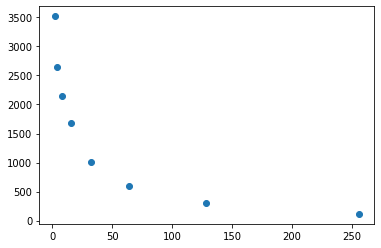

In [ ]:
for b in range(1,9):
    D_value = np.power(2,b)
    print("mse for D = %s: %s" % (D_value, MSE_errors[b-1]) )

mse_for_b_series = pd.Series(MSE_errors)
plt.scatter(2**(mse_for_b_series.index + 1), mse_for_b_series)

mad for D = 2: 47.21493911743164
mad for D = 4: 39.22738265991211
mad for D = 8: 32.5818977355957
mad for D = 16: 26.33602523803711
mad for D = 32: 19.047534942626953
mad for D = 64: 13.544551849365234
mad for D = 128: 9.19363784790039
mad for D = 256: 5.628452301025391


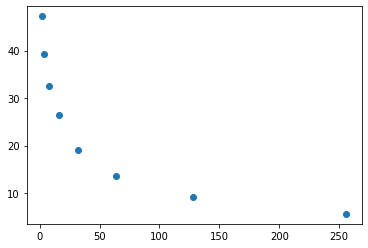

In [ ]:
for b in range(1,9):
    D_value = np.power(2,b)
    print("mad for D = %s: %s" % (D_value, MAD_errors[b-1]) )

mad_for_b_series = pd.Series(MAD_errors)
plt.scatter(2**(mad_for_b_series.index + 1), mad_for_b_series)

In [ ]:
def plot_MSE_and_MAD_images(MSE_matrix_list, MAD_matrix_list):
    """ Plots the recieved matrices side by side. """
    plt.figure(figsize=(20,80))
    for b in range(1,9):
        plt.subplot(8,2,2*b-1)
        plt.title(f"for a {np.power(2,b)} sub-sampling factor (MSE sense):")
        plt.imshow(MSE_matrix_list[b-1], cmap='gray')
        plt.subplot(8,2,2*b)
        plt.title(f"for a {np.power(2,b)} sub-sampling factor (MAD sense):")
        plt.imshow(MAD_matrix_list[b-1], cmap='gray')


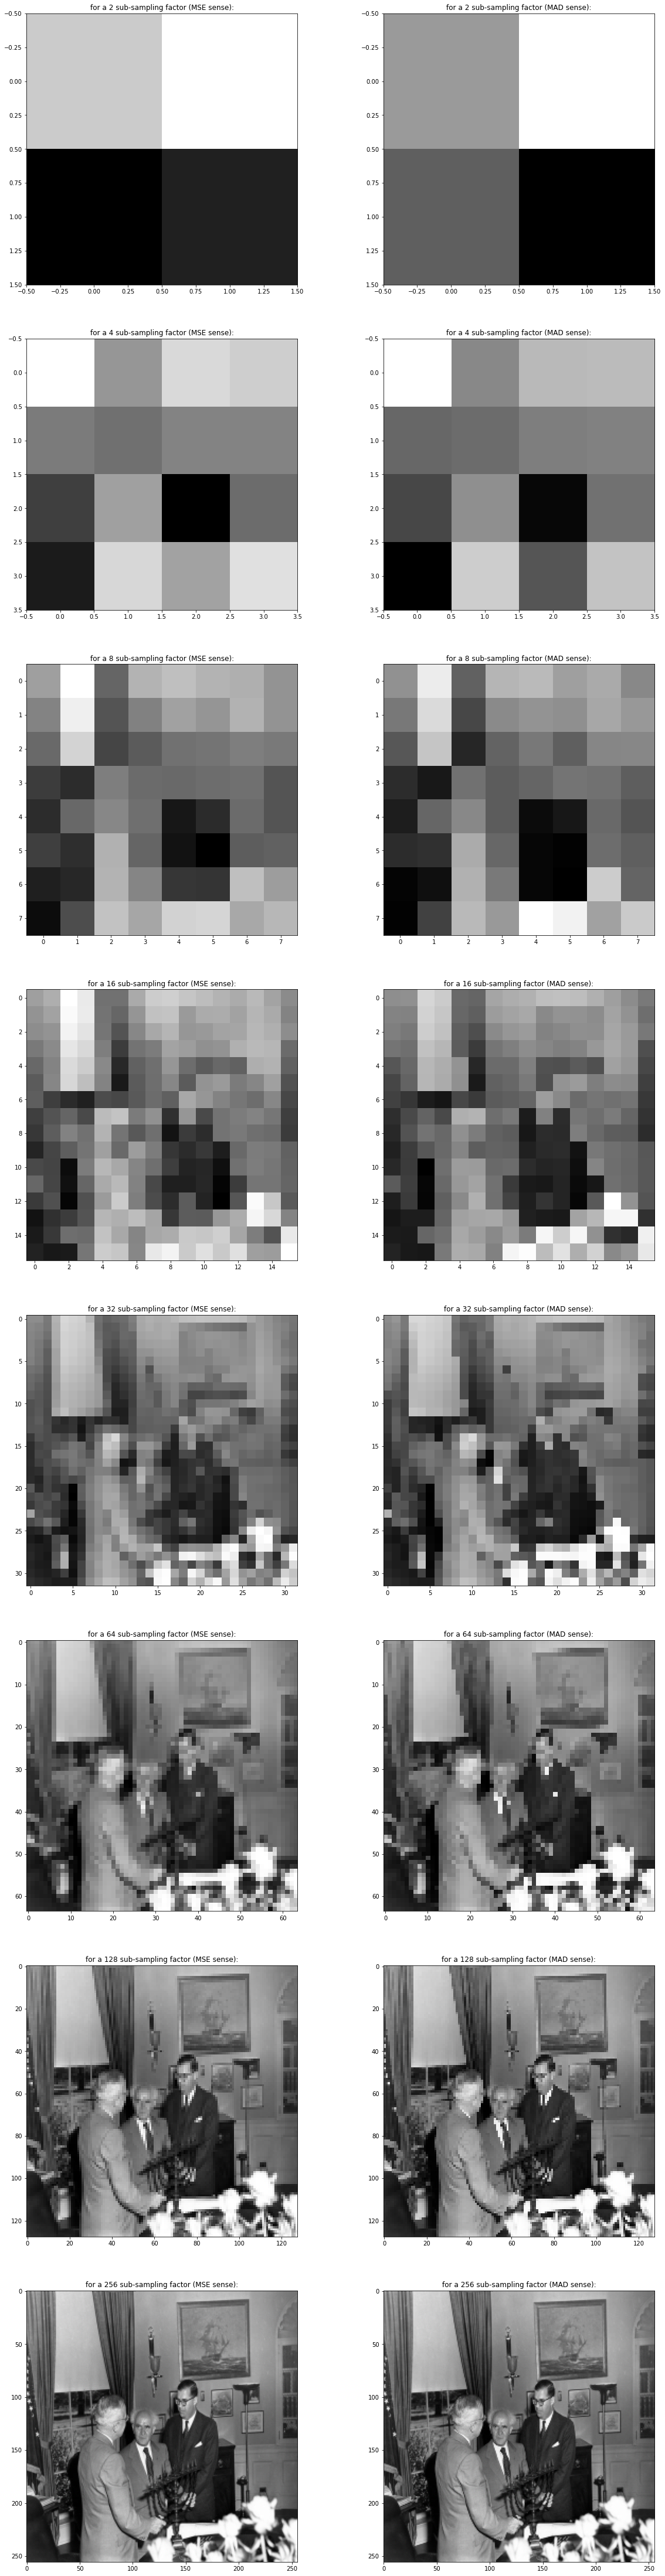

In [ ]:
# Here we plot the sampled matrices, without reconstruction.
plot_MSE_and_MAD_images(MSE_reps, MAD_reps)

Q2.

In [ ]:
# reconstructions are rounded at the offset to the nearest whole
# integer because both for MSE and MAD this minimizes error. For MSE it minimizes error since
# the error can be seperated to representation and quantization errors, and the minium
# quantization error is achieved for the closest quantized value. For MAD it is obvious
# from the MAD's form.

def get_reconstructed_from_reps(reps_list):
    reconstructed_list = []
    for b in range(1,9):
        rep_matrix = reps_list[b-1]
        D_value = np.power(2,9-b)
        new_picture = np.round(np.kron(rep_matrix,np.ones((D_value,D_value))) * function_range)
        reconstructed_list.append(new_picture)
    return reconstructed_list

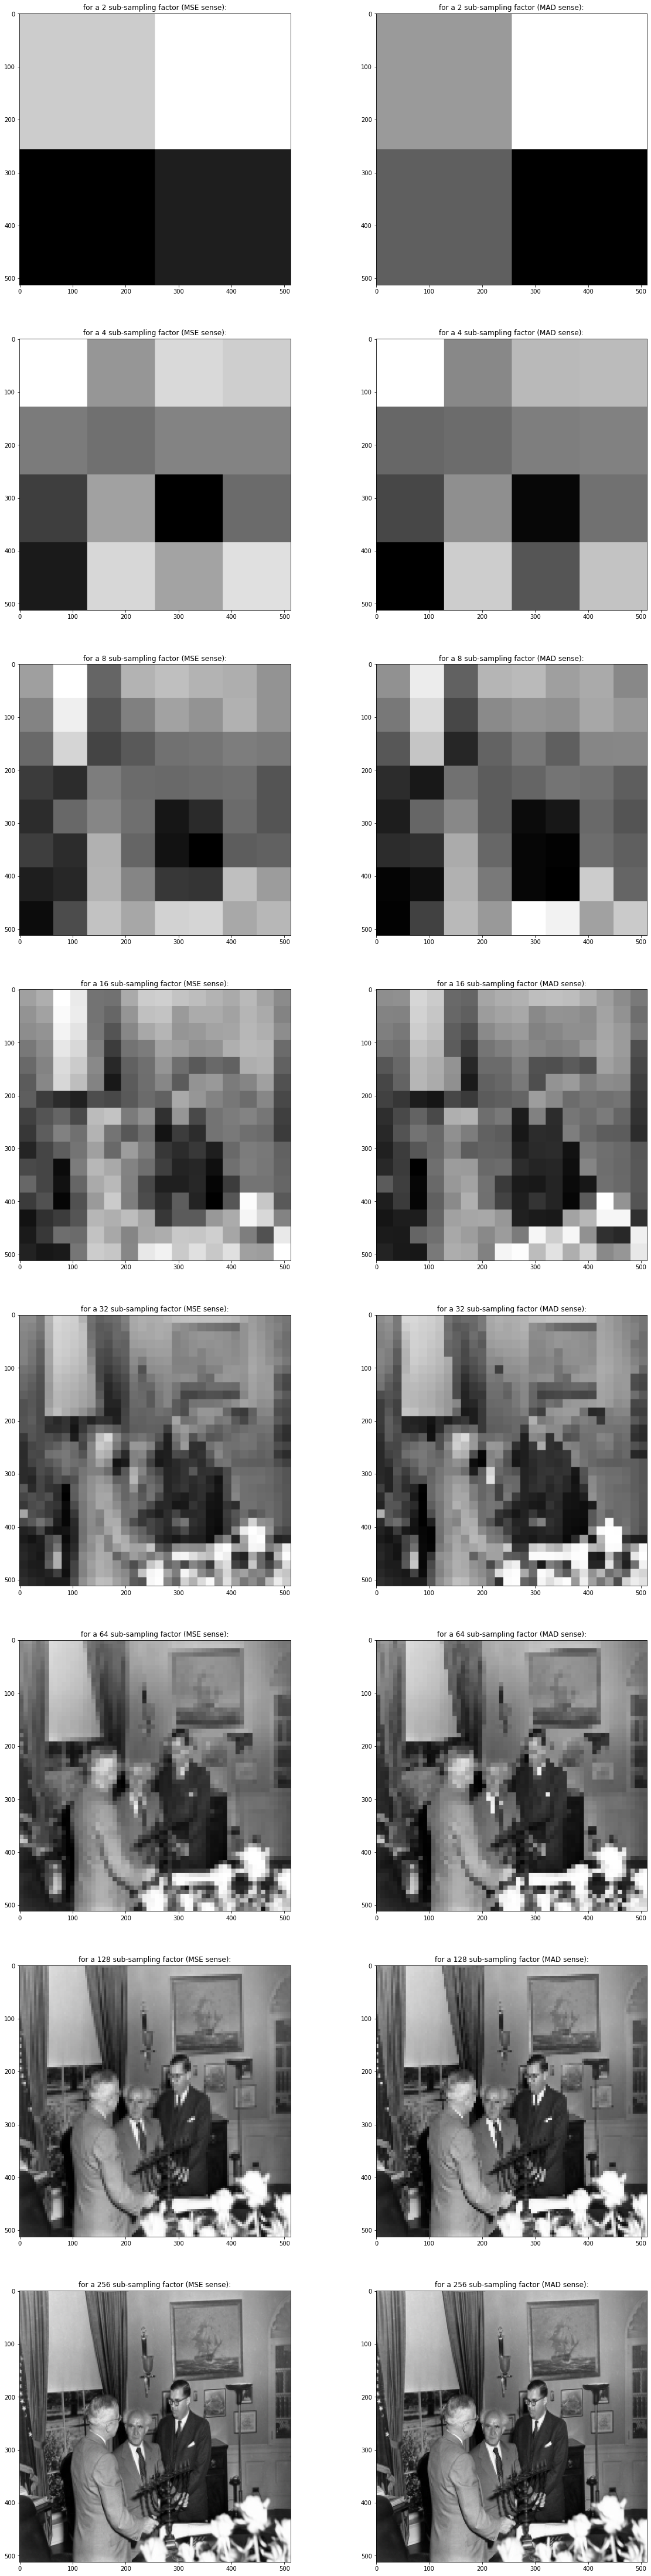

In [ ]:
# Here we plot the reconstructed images in their full size and integer values.
plot_MSE_and_MAD_images(get_reconstructed_from_reps(MSE_reps),get_reconstructed_from_reps(MAD_reps))